In this notebook we perform data exploration for the Glassdoor salary dataset:
https://glassdoor.app.box.com/v/gender-pay-data

First I'll load the libs needed for exploration.

In [1]:
# Dataframe management
import warnings
import matplotlib.pyplot as plt
import pandas as pd

# Numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={
    "font.family": 'sans',
    "font.size": 24,
    "axes.titlesize": 24,
    "axes.labelsize": 24
})

# import matplotlib and allow it to plot inline
%matplotlib inline

# ignore warnings
warnings.filterwarnings("ignore")


Matplotlib is building the font cache; this may take a moment.


Let's load the Glassdoor salary dataset

## The dataset

In [2]:
dataset  = pd.read_csv(r'./data.csv')
print('Glassdoor salaries dataset\n---------------------------\n')
print('Dataset characteristics\n-----------------------\n')

print(f'Number of instances: {len(dataset)}')
print(f'Number of attributes: 8  predictive attributes (2 numerical, 4 categorical, 2 ordinal) and the target variable')

print('Attribute information:')

print('jobTitle: the job titles of the employees - ', pd.unique(dataset['jobTitle']))
print('gender: the gender of the employees', pd.unique(dataset['gender']))
print('age: the age of the employees')
print(f'perfEval: the performance evaluation of the employees, from {dataset["perfEval"].min()} to {dataset["perfEval"].max()}')
print('edu: the educational level of the employees - ', pd.unique(dataset['edu']))
print('dept: the department that the employee is working on - ', pd.unique(dataset['dept']))
print(f'seniority: the seniority level of an employee, from {dataset["seniority"].min()} to {dataset["seniority"].max()}')
print('basePay: the base salary of the employee')
print('bonus: the bonus an employee will get based on the other attributes, this is our target variable')

print('Summary statistics:')
pd.set_option('display.precision', 2)
dataset.describe()


Glassdoor salaries dataset
---------------------------

Dataset characteristics
-----------------------

Number of instances: 1000
Number of attributes: 8  predictive attributes (2 numerical, 4 categorical, 2 ordinal) and the target variable
Attribute information:
jobTitle: the job titles of the employees -  ['Graphic Designer' 'Software Engineer' 'Warehouse Associate' 'IT'
 'Sales Associate' 'Driver' 'Financial Analyst' 'Marketing Associate'
 'Data Scientist' 'Manager']
gender: the gender of the employees ['Female' 'Male']
age: the age of the employees
perfEval: the performance evaluation of the employees, from 1 to 5
edu: the educational level of the employees -  ['College' 'PhD' 'Masters' 'High School']
dept: the department that the employee is working on -  ['Operations' 'Management' 'Administration' 'Sales' 'Engineering']
seniority: the seniority level of an employee, from 1 to 5
basePay: the base salary of the employee
bonus: the bonus an employee will get based on the other attr

,age,perfEval,seniority,basePay,bonus
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41.39,3.04,2.97,94472.65,6467.16
std,14.29,1.42,1.40,25337.49,2004.38
min,18.00,1.00,1.00,34208.00,1703.00
25%,29.00,2.00,2.00,76850.25,4849.50
50%,41.00,3.00,3.00,93327.50,6507.00
75%,54.25,4.00,4.00,111558.00,8026.00
max,65.00,5.00,5.00,179726.00,11293.00


In [3]:
print('Summarizing categorical values')
dataset.describe(include=object)

Summarizing categorical values


,jobTitle,gender,edu,dept
count,1000,1000,1000,1000
unique,10,2,4,5
top,Marketing Associate,Male,High School,Operations
freq,118,532,265,210


Missing values: None

Let's start by separating the numerical variables from the categorical ones, and specifying the target and input variables

In [4]:
numericalVariables = ['age', 'perfEval', 'seniority', 'basePay', 'bonus']
categoricalVariables = ['jobTitle', 'gender', 'edu', 'dept']

targetVariable = 'bonus'
inputVariables = dataset.columns[dataset.columns != targetVariable]

Let's get some statistics about continuous attributes

In [5]:
dataset.describe()

,age,perfEval,seniority,basePay,bonus
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41.39,3.04,2.97,94472.65,6467.16
std,14.29,1.42,1.40,25337.49,2004.38
min,18.00,1.00,1.00,34208.00,1703.00
25%,29.00,2.00,2.00,76850.25,4849.50
50%,41.00,3.00,3.00,93327.50,6507.00
75%,54.25,4.00,4.00,111558.00,8026.00
max,65.00,5.00,5.00,179726.00,11293.00


## Exploring the data
We need to understand how the data in this dataset relate to the bonus applied to the employee.

Before we can do that, we need to first understand our variables. Let's start with the numerical ones, specifically our target variable, bonus.

Let's see what values our variable can take, as well as the distribution and dispersion, by plotting it with an histogram.

[Text(0.5, 0, 'Bonus'), Text(0, 0.5, 'count')]

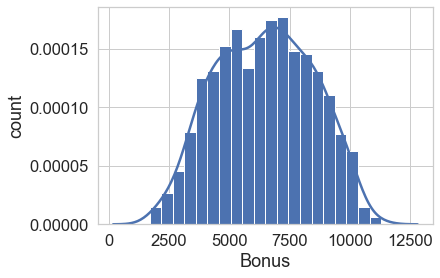

In [6]:
sns.set_style(style='whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "figure.figsize": [8, 5]})
sns.distplot(
	dataset[targetVariable],
	norm_hist = False,
	kde = True,
	bins = 20,
	hist_kws = { "alpha": 1 }
).set(xlabel = 'Bonus', ylabel = 'count')

Looking at this plot we can see that few employees are receiving a bonus below 4000, most of them a getting between 4000 and 8000 and a very few employees are getting more that 10000.

Let's get some insights on the other numerical variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'perfEval'}>,
        <AxesSubplot:title={'center':'seniority'}>,
        <AxesSubplot:title={'center':'basePay'}>],
       [<AxesSubplot:title={'center':'bonus'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

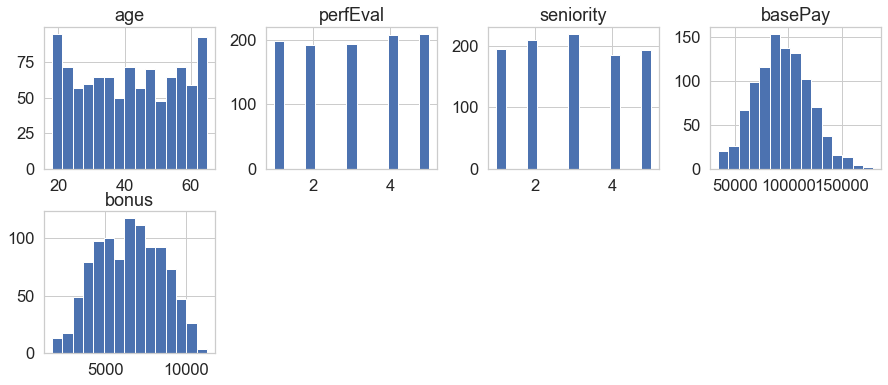

In [7]:
dataset[numericalVariables].hist(bins=15, figsize=(15, 6), layout=(2, 4))


We can see that the ages with the most employees are placed among 20's and above 60y/o, the rest of them are sort of balanced. The performance evaluation and seniority levels are also balanced with the number of employees. Finally at base pay we can see that most of them are getting between 80000 and 110000 and a very few of them are getting more than 150000.

In [8]:
dataset['age_group'] = dataset['age']
def getGroup(age):
	if age < 30:
		return 'young'
	if age < 45:
		return 'mid-age'
	return 'old'

dataset['age_group'] = [getGroup(age) for age in dataset['age_group']]


Now let's take a look at how the bonus relates to the age and seniority level

<function matplotlib.pyplot.show(close=None, block=None)>

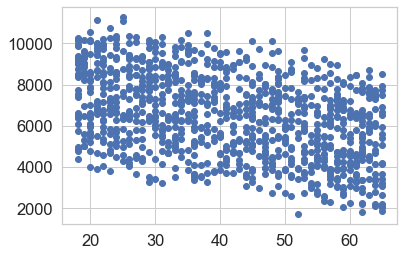

In [9]:
# sns.barplot(x=dataset['age_group'], y=dataset['perfEval'])
# add labels
plt.scatter(x=dataset['age'], y=dataset['bonus'])
plt.show

We can see that the youngest people tend to to have highest bonus that the oldest ones.

<function matplotlib.pyplot.show(close=None, block=None)>

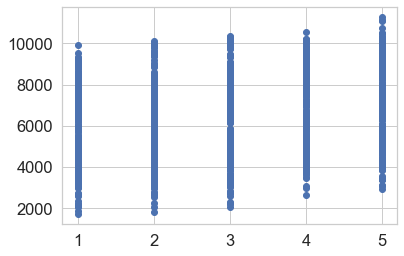

In [10]:
# Senioridade e bonus
plt.scatter(x=dataset['seniority'],  y=dataset['bonus'])
plt.show

We can see that the bonus tend to grow with the seniority level.

### Analyzing categorical variables

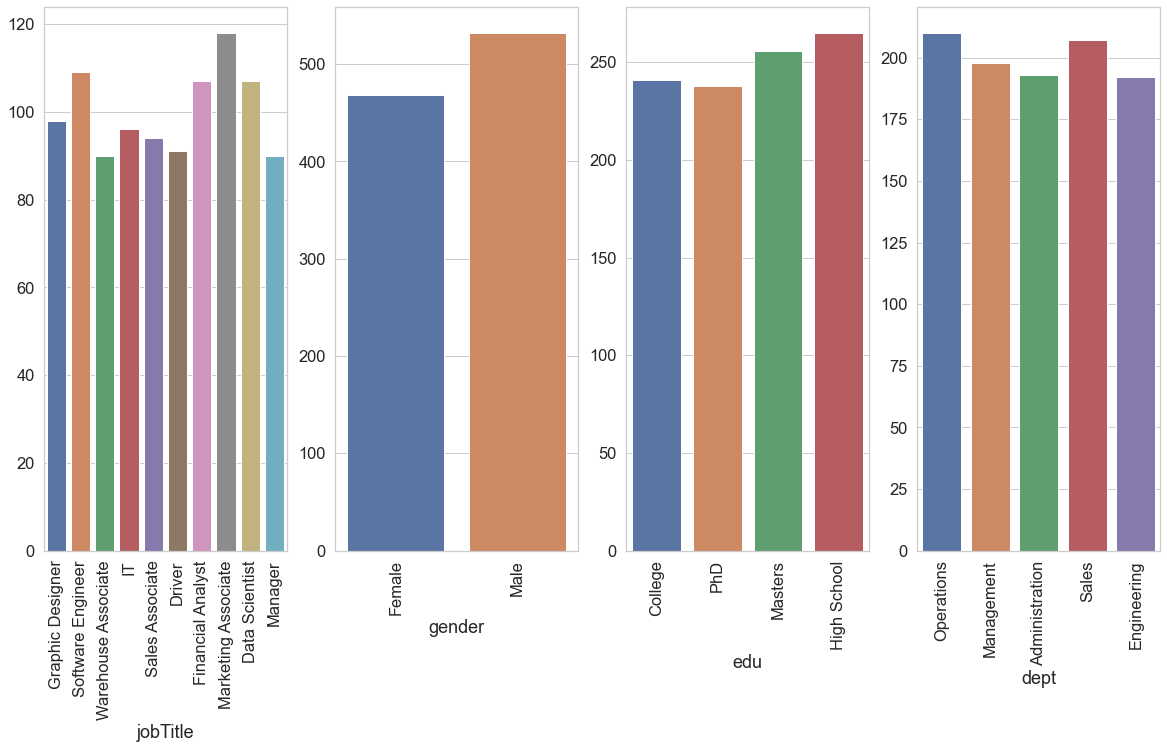

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for variable, subplot in zip(categoricalVariables, ax.flatten()):
	sns.countplot(dataset[variable], ax=subplot).set(ylabel='')
	for label in subplot.get_xticklabels():
		label.set_rotation(90)

We can see that the data is well distributed here.

### Correlational analysis

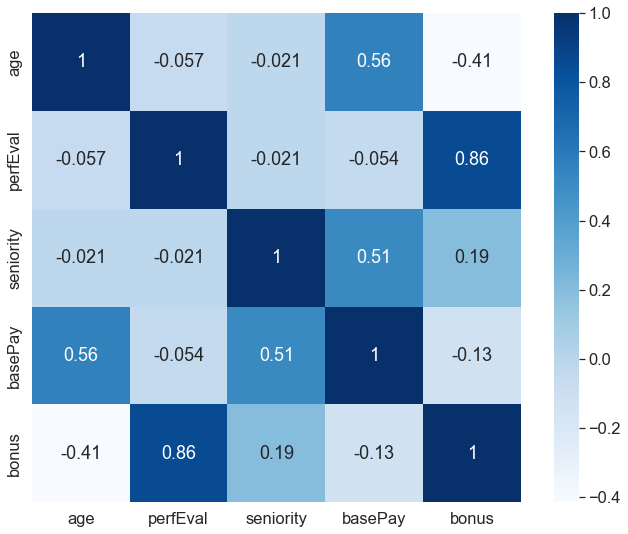

In [12]:
corrmat = dataset.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, square=True, cmap="Blues", annot=True);

Not surprisingly, the performance evaluation is highly correlated to the bonus, witch means that people with more performance tend to have a better bonus.
Something interest is that when the age grows the bonus tend to lower.

## Creating train and test sets

In [13]:
# Transforming categorical values to numeric
numData = pd.get_dummies(dataset, columns=categoricalVariables, drop_first=True)
numData.head()

,age,perfEval,seniority,basePay,bonus,age_group,jobTitle_Driver,jobTitle_Financial Analyst,jobTitle_Graphic Designer,jobTitle_IT,...,jobTitle_Software Engineer,jobTitle_Warehouse Associate,gender_Male,edu_High School,edu_Masters,edu_PhD,dept_Engineering,dept_Management,dept_Operations,dept_Sales
0,18,5,2,42363,9938,young,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,21,5,5,108476,11128,young,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,19,4,5,90208,9268,young,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,20,5,4,108080,10154,young,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,26,5,5,99464,9319,young,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [14]:
# Create train and test sets
targets = numData['bonus']
inputs = numData.drop(['bonus', 'age_group'], axis=1)
inputs.head()

,age,perfEval,seniority,basePay,jobTitle_Driver,jobTitle_Financial Analyst,jobTitle_Graphic Designer,jobTitle_IT,jobTitle_Manager,jobTitle_Marketing Associate,...,jobTitle_Software Engineer,jobTitle_Warehouse Associate,gender_Male,edu_High School,edu_Masters,edu_PhD,dept_Engineering,dept_Management,dept_Operations,dept_Sales
0,18,5,2,42363,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,5,5,108476,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,19,4,5,90208,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,20,5,4,108080,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,26,5,5,99464,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaledInputs = StandardScaler().fit_transform(inputs)
scaledInputs

array([[-1.6372817 ,  1.37924092, -0.6963913 , ..., -0.49687301,
         1.93956303, -0.51091491],
       [-1.42731098,  1.37924092,  1.45517812, ...,  2.01258666,
        -0.51558005, -0.51091491],
       [-1.56729146,  0.67662201,  1.45517812, ..., -0.49687301,
        -0.51558005, -0.51091491],
       ...,
       [ 0.46242552, -1.43123471, -1.41358111, ..., -0.49687301,
         1.93956303, -0.51091491],
       [ 1.65225961, -0.72861581, -1.41358111, ..., -0.49687301,
        -0.51558005, -0.51091491],
       [ 1.30230841, -1.43123471, -0.6963913 , ..., -0.49687301,
        -0.51558005,  1.95727307]])

In [16]:
# Create train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledInputs,targets,test_size=0.2, random_state=365)

# Creating models

In [17]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Adaboost model

In [18]:

randomSeed = 1234
adaboostModel = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=300, random_state=randomSeed)
adaboostModel.fit(x_train, y_train.ravel())
y_predict = adaboostModel.predict(x_test)
y_test-y_predict

579    -323.78
206     105.83
821     286.12
252     -42.93
733   -1378.82
        ...   
695   -1284.45
443    -192.46
820     745.55
521      33.24
884   -1523.78
Name: bonus, Length: 200, dtype: float64

In [19]:
adaboostModel.score(x_train, y_train.ravel())*100

88.43653050794609

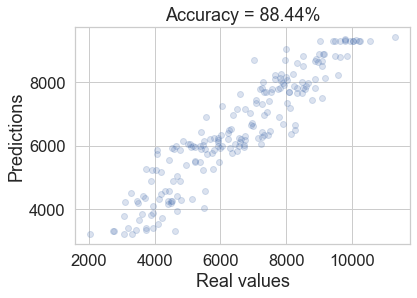

In [20]:
plt.scatter(y_test, y_predict,  alpha=0.2)

plt.xlabel("Real values",size=18)
plt.ylabel("Predictions",size=18)

plt.title(f'Accuracy = {round(adaboostModel.score(x_train, y_train.ravel())*100, 2)}%')

plt.show()

## Linear regression model

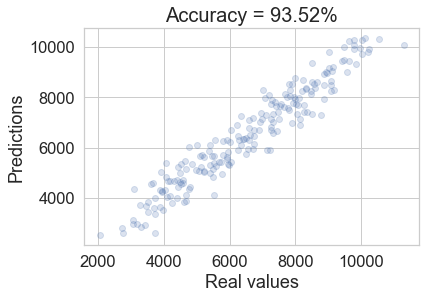

In [21]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

# model output for the input data
y_hat = regr.predict(x_test)

plt.scatter(y_test, y_hat,  alpha=0.2)

plt.xlabel("Real values",size=18)
plt.ylabel("Predictions",size=18)

plt.title(f'Accuracy = {round(regr.score(x_train, y_train)*100, 2)}%',size=20)

plt.show()

This one has a higher accuracy.

In [22]:
y_test-y_hat

579   -378.51
206   -136.13
821   -153.16
252   -268.91
733   -829.11
        ...  
695   -503.35
443    113.79
820    559.24
521    317.66
884   -284.59
Name: bonus, Length: 200, dtype: float64

**Model evaluation Linear Regression with cross validation**

In [23]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=10)

print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 0.93 with a standard deviation of 0.02


### KNN

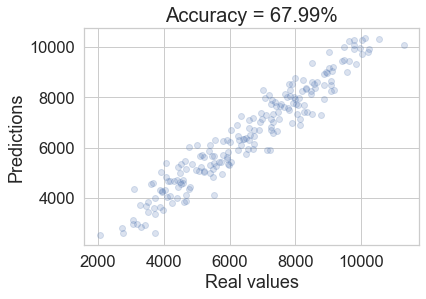

In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(5, weights='uniform')

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

plt.scatter(y_test, y_hat,  alpha=0.2)

plt.xlabel("Real values",size=18)
plt.ylabel("Predictions",size=18)

plt.title(f'Accuracy = {round(knn.score(x_train, y_train)*100, 2)}%',size=20)

plt.show()

In [25]:
y_test-y_pred

579    -814.0
206    2457.2
821   -1997.8
252    1502.2
733   -1795.8
        ...  
695    -292.2
443    -467.8
820    -218.2
521     683.6
884   -2658.4
Name: bonus, Length: 200, dtype: float64